# Pandas (продолжение)

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Упражнение 1

Найдите и выведи индексы пропущенных значений.
Заполните пропущеные значения следующими способами: 

1) Среднимим значения 
2) Медианными значениями 
3) Наиболее часто встечающимися 
4) Линейной интерполяцией 

In [72]:
df = pd.DataFrame({
'ord_no': [70001, np.nan, 70002, 70004, np.nan, 70005, np.nan, 70010, 70003, 70012, np.nan, 70013],
'purch_amt': [150.5, np.nan, 65.26, 110.5, 948.5, np.nan, 5760, 1983.43, np.nan, 250.45, 75.29, 3045.6],
'sale_amt': [10.5, 20.65, np.nan, 11.5, 98.5, np.nan, 57, 19.43, np.nan, 25.45, 75.29, 35.6],
'ord_date': ['2012-10-05', '2012-09-10', np.nan, '2012-08-17', '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', '2012-04-25'],
'customer_id': [3002, 3001, 3001, 3003, 3002, 3001, 3001, 3004, 3003, 3002, 3001, 3001],
'salesman_id': [5002, 5003, 5001,np.nan, 5002, 5001, 5001,np.nan, 5003, 5002, 5003,np.nan]})

df["ord_date"] = pd.to_datetime(df["ord_date"])
df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,NaN,NaN,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,NaN,NaT,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,NaN
4,NaN,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,NaN,NaN,2012-07-27,3001,5001.0
6,NaN,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,NaN
8,70003.0,NaN,NaN,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [73]:
# Mean 
# df1.fillna(df.mean())
df1 = df.copy()
for column in df1.columns:
    df1[column] = df1[column].fillna(df1[column].mean())

df1

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.00,150.500000,10.500000,2012-10-05 00:00:00.000000000,3002,5002.0
1,70006.25,1376.614444,20.650000,2012-09-10 00:00:00.000000000,3001,5003.0
2,70002.00,65.260000,39.324444,2012-08-20 21:49:05.454545408,3001,5001.0
3,70004.00,110.500000,11.500000,2012-08-17 00:00:00.000000000,3003,5002.0
4,70006.25,948.500000,98.500000,2012-09-10 00:00:00.000000000,3002,5002.0
5,70005.00,1376.614444,39.324444,2012-07-27 00:00:00.000000000,3001,5001.0
6,70006.25,5760.000000,57.000000,2012-09-10 00:00:00.000000000,3001,5001.0
7,70010.00,1983.430000,19.430000,2012-10-10 00:00:00.000000000,3004,5002.0
8,70003.00,1376.614444,39.324444,2012-10-10 00:00:00.000000000,3003,5003.0
9,70012.00,250.450000,25.450000,2012-06-27 00:00:00.000000000,3002,5002.0


In [74]:
# Median
df2 = df.copy()
for column in df2.columns:
    df2[column] = df2[column].fillna(df2[column].median())

df2

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,70004.5,250.45,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,25.45,2012-09-10,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,5002.0
4,70004.5,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,250.45,25.45,2012-07-27,3001,5001.0
6,70004.5,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,5002.0
8,70003.0,250.45,25.45,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [75]:
# Frequent
df3 = df.copy()
for column in df3.columns:
    df3[column] = df3[column].fillna(df3[column].mode().iloc[0])

df3
df3.fillna(df.mode().iloc[0])

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,70001.0,65.26,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,10.50,2012-09-10,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,5001.0
4,70001.0,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,65.26,10.50,2012-07-27,3001,5001.0
6,70001.0,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,5001.0
8,70003.0,65.26,10.50,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [76]:
# Interpolate
df4 = df.copy()
# df4 = df4.interpolate() 

n = len(df4.columns.values)
for i in [0, 1, 2, 4, 5]:
    df4.iloc[:, i].fillna(df4.iloc[:, i].interpolate(), inplace=True)

df4

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.500,2012-10-05,3002,5002.0
1,70001.5,107.88,20.650,2012-09-10,3001,5003.0
2,70002.0,65.26,16.075,NaT,3001,5001.0
3,70004.0,110.50,11.500,2012-08-17,3003,5001.5
4,70004.5,948.50,98.500,2012-09-10,3002,5002.0
5,70005.0,3354.25,77.750,2012-07-27,3001,5001.0
6,70007.5,5760.00,57.000,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.430,2012-10-10,3004,5002.0
8,70003.0,1116.94,22.440,2012-10-10,3003,5003.0
9,70012.0,250.45,25.450,2012-06-27,3002,5002.0


## Упражнение 2


DataFrame дан ниже


1. Найдите все алмазы которые по любому линейному размеру больше 5.

2. Создайте новый DataFrame в которому исключены все не чиcловые столбы исходного DataFrame. 

3. Расчитатйте средние значения для каждого столбца

4. Постройте график средних цен для каждой категории (cut) алмазов.

5. Постройте гистрограмму веса ('carat') алмазов.

6. Посчитайте все пропущенные занчения в Dataframe

7. Создайте новый DataFrame в которому исключены все строки с пропущенными занчениями

8. Узнайте реальное использование оперативной памяти вашим DataFrame

9. Напишите функцию возращающую 20 случайных строчек из DataFrame (без повторений)

In [77]:
diamonds = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [78]:
# 1
d1 = diamonds[(diamonds["x"] > 5) | (diamonds["y"] > 5) | (diamonds["z"] > 5)]
d1

,carat,cut,color,clarity,depth,table,price,x,y,z
90,0.70,Ideal,E,SI1,62.5,57.0,2757,5.70,5.72,3.57
91,0.86,Fair,E,SI2,55.1,69.0,2757,6.45,6.33,3.52
92,0.70,Ideal,G,VS2,61.6,56.0,2757,5.70,5.67,3.50
93,0.71,Very Good,E,VS2,62.4,57.0,2759,5.68,5.73,3.56
94,0.78,Very Good,G,SI2,63.8,56.0,2759,5.81,5.85,3.72
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [79]:
# 2
d2 = pd.DataFrame()
# type(diamonds.iloc[:,i::][0])
for column in diamonds.columns:
    if (diamonds[column].dtype == "int64") | (diamonds[column].dtype == "float64"):
        d2[column] = diamonds[column]

d2

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [80]:
# 3
diamonds.mean()

C:\Users\volod\AppData\Local\Temp\ipykernel_8404\2841982597.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  diamonds.mean()


carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

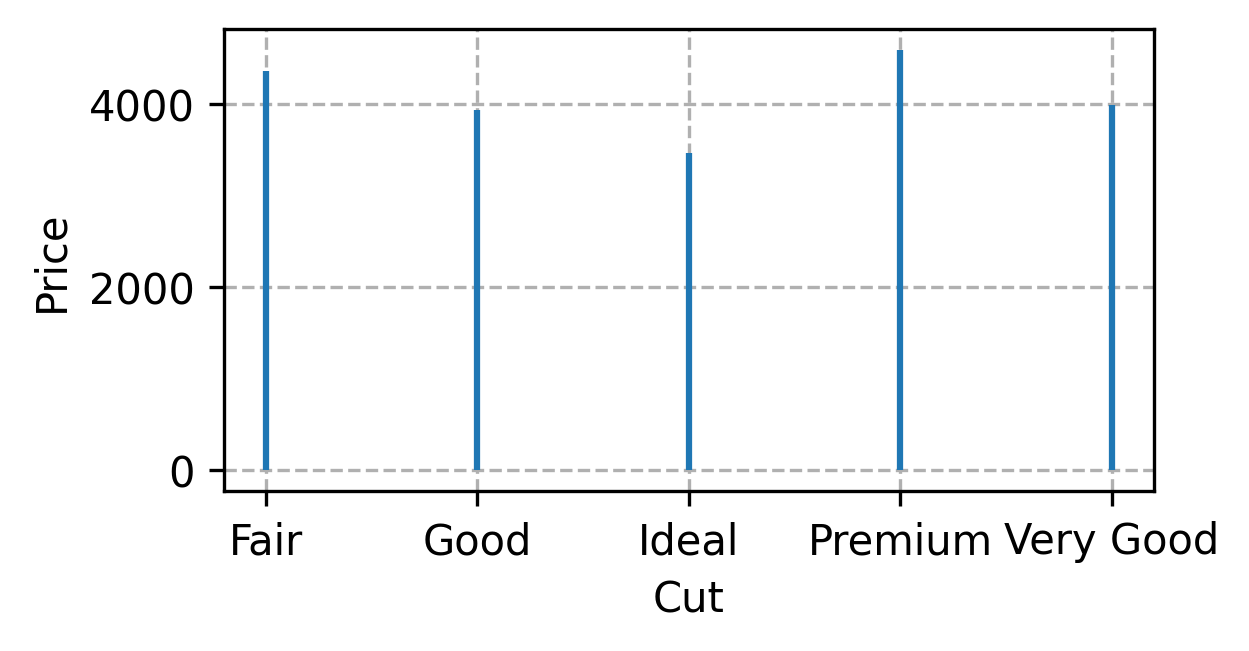

In [81]:
# 4. Постройте график средних цен для каждой категории (cut) алмазов.
d4 = diamonds.groupby(['cut']).agg({"price": "mean"})

plt.figure(figsize=(4,2), dpi = 300) # размер графика
plt.xlabel("Cut") # подписи к осям
plt.ylabel("Price")
plt.grid(True, linestyle="--") # пунктирная сетка

plt.vlines(d4.index.values, ymin = 0, ymax = d4)
# for x, y in enumerate(d4):
#     plt.text(x, d4, round(d4, 1), horizontalalignment='center')

# plt.legend() # легенда
plt.show()

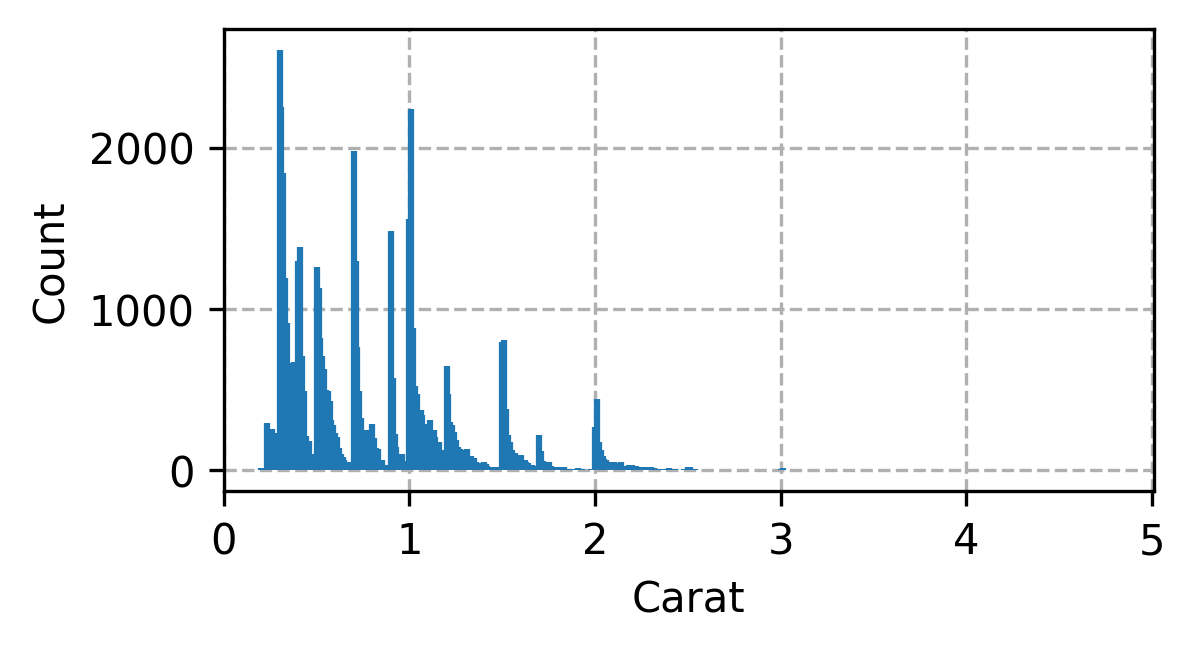

(       carat
 carat       
 0.20      12
 0.21       9
 0.22       5
 0.23     293
 0.24     254
 ...      ...
 4.00       1
 4.01       2
 4.13       1
 4.50       1
 5.01       1
 
 [273 rows x 1 columns],
 None)

In [82]:
# 5. Постройте гистрограмму веса ('carat') алмазов
d5 = diamonds.groupby(['carat']).agg({"carat": "count"})
d5

plt.figure(figsize=(4,2), dpi = 300) # размер графика
plt.xlabel("Carat") # подписи к осям
plt.ylabel("Count")
plt.grid(True, linestyle="--") # пунктирная сетка

plt.xlim([0, max(d5.index.values)])
plt.vlines(d5.index.values, ymin = 0, ymax = d5)

# plt.legend() # легенда
d5, plt.show()

In [83]:
# 6
diamonds.isnull().sum().sum()

0

In [84]:
# 7
d7 = diamonds[diamonds.isnull() == False]
d7

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [85]:
# 8
print(diamonds.memory_usage().sum() % 1024, "kilobytes")

192 kilobytes


In [86]:
# 9
def random20 (df):
    indexes = np.random.randint(len(df.index.values), size = 20)
    return df.loc[indexes]

random20(diamonds)

,carat,cut,color,clarity,depth,table,price,x,y,z
9946,1.01,Ideal,G,SI1,62.3,57.0,4694,6.41,6.36,3.98
53430,0.70,Ideal,F,SI1,61.1,56.0,2671,5.74,5.78,3.52
29369,0.31,Ideal,G,VS2,62.3,56.0,698,4.34,4.29,2.69
38911,0.33,Ideal,G,IF,61.6,55.0,1052,4.51,4.48,2.77
42190,0.50,Premium,F,SI1,61.0,60.0,1286,5.11,5.08,3.11
4367,0.79,Ideal,E,VS2,61.8,56.0,3605,5.91,5.94,3.66
39289,0.30,Ideal,H,VS2,62.1,55.0,491,4.33,4.36,2.70
43133,0.58,Good,F,SI1,63.1,57.0,1388,5.29,5.33,3.35
12889,1.10,Ideal,H,SI1,62.0,57.0,5370,6.66,6.70,4.14
12526,1.07,Ideal,F,SI1,61.9,56.0,5264,6.55,6.61,4.07


## Упражнение 3
##### ~определенно не баян~ classic

Наконец-то, пришло время взяться за настоящий дата инжениринг и дата саенс. Датасет [титаник](https://www.kaggle.com/c/titanic).

1. Найдите два отдельных распределения по классам и возрастам пассажиров Титаника.
2. Разделите на две возрастные группы такие, что в них входят одинаковое количество пассажиров определенного класса. Определить такие группы для каждого пола (male/female)
3. На основе полученных групп определите доли выживших. (должно получится 12 чисел)
4. Найдите средний возраст выжившего для каждого из полов на основе полного набора данных
5. Найдите несмещенное среднеквадратическое отклонение возраста для выживших
6. Постройте график зависимости доли выживаемости от возроста
7. Постройте куммулятивный график выживаемости в зависимости от возраста для разных полов
8. Определите общие расходы пассажиров
9. Средих всех пассажиров найдите Екатерин (`Kate`, `Katerina`, `Ekaterina` ...)
10. `*`Определите имена для мужчин и женщин, которые чаще остальных встречались на корабле. Выведите список первых пяти.

In [87]:
import pandas as pd
titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [91]:
# 1
titanic.groupby(["pclass"]).agg("count")

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
pclass,,,,,,,,,,,,,,
1,216,216,186,216,216,216,214,216,216,216,175,214,216,216
2,184,184,173,184,184,184,184,184,184,184,16,184,184,184
3,491,491,355,491,491,491,491,491,491,491,12,491,491,491


In [93]:
titanic.groupby(["age"]).agg("count")

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
age,,,,,,,,,,,,,,
0.42,1,1,1,1,1,1,1,1,1,1,0,1,1,1
0.67,1,1,1,1,1,1,1,1,1,1,0,1,1,1
0.75,2,2,2,2,2,2,2,2,2,2,0,2,2,2
0.83,2,2,2,2,2,2,2,2,2,2,0,2,2,2
0.92,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70.00,2,2,2,2,2,2,2,2,2,2,1,2,2,2
70.50,1,1,1,1,1,1,1,1,1,1,0,1,1,1
71.00,2,2,2,2,2,2,2,2,2,2,1,2,2,2


In [94]:
# 2
male1 = titanic[(titanic['sex'] == "male") & (titanic['pclass'] == 1)].sort_values(by="age", ascending = True)
male1_up = male1.iloc[:int(len(male1)/2)]
male1_down = male1.iloc[int(len(male1)/2):]
male1_up, male1_down

(     survived  pclass   sex    age  sibsp  parch      fare embarked  class  \
 305         1       1  male   0.92      1      2  151.5500        S  First   
 445         1       1  male   4.00      0      2   81.8583        S  First   
 802         1       1  male  11.00      1      2  120.0000        S  First   
 550         1       1  male  17.00      0      2  110.8833        C  First   
 505         0       1  male  18.00      1      0  108.9000        C  First   
 ..        ...     ...   ...    ...    ...    ...       ...      ...    ...   
 187         1       1  male  45.00      0      0   26.5500        S  First   
 339         0       1  male  45.00      0      0   35.5000        S  First   
 536         0       1  male  45.00      0      0   26.5500        S  First   
 331         0       1  male  45.50      0      0   28.5000        S  First   
 789         0       1  male  46.00      0      0   79.2000        C  First   
 
        who  adult_male deck  embark_town alive  a

In [97]:
male2 = titanic[(titanic['sex'] == "male") & (titanic['pclass'] == 2)].sort_values(by="age", ascending = True)
male2_up = male2.iloc[:int(len(male2)/2)]
male2_down = male2.iloc[int(len(male2)/2):]
male2_up, male2_down

(     survived  pclass   sex    age  sibsp  parch     fare embarked   class  \
 755         1       2  male   0.67      1      1  14.5000        S  Second   
 831         1       2  male   0.83      1      1  18.7500        S  Second   
 78          1       2  male   0.83      0      2  29.0000        S  Second   
 183         1       2  male   1.00      2      1  39.0000        S  Second   
 827         1       2  male   1.00      0      2  37.0042        C  Second   
 340         1       2  male   2.00      1      1  26.0000        S  Second   
 407         1       2  male   3.00      1      1  18.7500        S  Second   
 193         1       2  male   3.00      1      1  26.0000        S  Second   
 549         1       2  male   8.00      1      1  36.7500        S  Second   
 841         0       2  male  16.00      0      0  10.5000        S  Second   
 791         0       2  male  16.00      0      0  26.0000        S  Second   
 228         0       2  male  18.00      0      0  1

In [98]:
male3 = titanic[(titanic['sex'] == "male") & (titanic['pclass'] == 3)].sort_values(by="age", ascending = True)
male3_up = male3.iloc[:int(len(male3)/2)]
male3_down = male3.iloc[int(len(male3)/2):]
male3_up, male3_down

(     survived  pclass   sex    age  sibsp  parch     fare embarked  class  \
 803         1       3  male   0.42      0      1   8.5167        C  Third   
 788         1       3  male   1.00      1      2  20.5750        S  Third   
 164         0       3  male   1.00      4      1  39.6875        S  Third   
 386         0       3  male   1.00      5      2  46.9000        S  Third   
 7           0       3  male   2.00      3      1  21.0750        S  Third   
 ..        ...     ...   ...    ...    ...    ...      ...      ...    ...   
 244         0       3  male  30.00      0      0   7.2250        C  Third   
 798         0       3  male  30.00      0      0   7.2292        C  Third   
 488         0       3  male  30.00      0      0   8.0500        S  Third   
 286         1       3  male  30.00      0      0   9.5000        S  Third   
 606         0       3  male  30.00      0      0   7.8958        S  Third   
 
        who  adult_male deck  embark_town alive  alone  
 803 

In [96]:
female1 = titanic[(titanic['sex'] == "female") & (titanic['pclass'] == 1)].sort_values(by="age", ascending = True)
female1_up = female1.iloc[:int(len(female1)/2)]
female1_down = female1.iloc[int(len(female1)/2):]
female1_up, female1_down

(     survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
 297         0       1  female   2.0      1      2  151.5500        S  First   
 435         1       1  female  14.0      1      2  120.0000        S  First   
 689         1       1  female  15.0      0      1  211.3375        S  First   
 853         1       1  female  16.0      0      1   39.4000        S  First   
 504         1       1  female  16.0      0      0   86.5000        S  First   
 329         1       1  female  16.0      0      1   57.9792        C  First   
 307         1       1  female  17.0      1      0  108.9000        C  First   
 781         1       1  female  17.0      1      0   57.0000        S  First   
 585         1       1  female  18.0      0      2   79.6500        S  First   
 700         1       1  female  18.0      1      0  227.5250        C  First   
 311         1       1  female  18.0      2      2  262.3750        C  First   
 291         1       1  female  19.0    

In [99]:
female2 = titanic[(titanic['sex'] == "female") & (titanic['pclass'] == 2)].sort_values(by="age", ascending = True)
female2_up = female2.iloc[:int(len(female2)/2)]
female2_down = female2.iloc[int(len(female2)/2):]
female2_up, female2_down

(     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
 530         1       2  female   2.0      1      1  26.0000        S  Second   
 43          1       2  female   3.0      1      2  41.5792        C  Second   
 750         1       2  female   4.0      1      1  23.0000        S  Second   
 618         1       2  female   4.0      2      1  39.0000        S  Second   
 58          1       2  female   5.0      1      2  27.7500        S  Second   
 720         1       2  female   6.0      0      1  33.0000        S  Second   
 535         1       2  female   7.0      0      2  26.2500        S  Second   
 237         1       2  female   8.0      0      2  26.2500        S  Second   
 446         1       2  female  13.0      0      1  19.5000        S  Second   
 9           1       2  female  14.0      1      0  30.0708        C  Second   
 389         1       2  female  17.0      0      0  12.0000        C  Second   
 84          1       2  female  17.0    

In [100]:
female3 = titanic[(titanic['sex'] == "female") & (titanic['pclass'] == 3)].sort_values(by="age", ascending = True)
female3_up = female3.iloc[:int(len(female3)/2)]
female3_down = female3.iloc[int(len(female3)/2):]
female3_up, female3_down

(     survived  pclass     sex    age  sibsp  parch     fare embarked  class  \
 644         1       3  female   0.75      2      1  19.2583        C  Third   
 469         1       3  female   0.75      2      1  19.2583        C  Third   
 172         1       3  female   1.00      1      1  11.1333        S  Third   
 381         1       3  female   1.00      0      2  15.7417        C  Third   
 205         0       3  female   2.00      0      1  10.4625        S  Third   
 ..        ...     ...     ...    ...    ...    ...      ...      ...    ...   
 315         1       3  female  26.00      0      0   7.8542        S  Third   
 216         1       3  female  27.00      0      0   7.9250        S  Third   
 8           1       3  female  27.00      0      2  11.1333        S  Third   
 823         1       3  female  27.00      0      1  12.4750        S  Third   
 100         0       3  female  28.00      0      0   7.8958        S  Third   
 
        who  adult_male deck  embark_t

In [103]:
# 3. На основе полученных групп определите доли выживших. (должно получится 12 чисел)
male1_up_s = male1_up["survived"].mean() * 100
male1_down_s = male1_down["survived"].mean() * 100
female1_up_s = female1_up["survived"].mean() * 100
female1_down_s = female1_down["survived"].mean() * 100
male1_up_s, male1_down_s, female1_up_s, female1_down_s

(47.540983606557376, 26.229508196721312, 95.74468085106383, 97.87234042553192)

In [104]:
male2_up_s = male2_up["survived"].mean() * 100
male2_down_s = male2_down["survived"].mean() * 100
female2_up_s = female2_up["survived"].mean() * 100
female2_down_s = female2_down["survived"].mean() * 100
male2_up_s, male2_down_s, female2_up_s, female2_down_s

(20.37037037037037, 11.11111111111111, 92.10526315789474, 92.10526315789474)

In [105]:
male3_up_s = male3_up["survived"].mean() * 100
male3_down_s = male3_down["survived"].mean() * 100
female3_up_s = female3_up["survived"].mean() * 100
female3_down_s = female3_down["survived"].mean() * 100
male3_up_s, male3_down_s, female3_up_s, female3_down_s

(16.76300578034682, 10.344827586206897, 52.77777777777778, 47.22222222222222)

In [108]:
# 4. Найдите средний возраст выжившего для каждого из полов на основе полного набора данных
male_s_mean = titanic["age"][(titanic["survived"] == 1) & (titanic["sex"] == "male")].mean()
female_s_mean = titanic["age"][(titanic["survived"] == 1) & (titanic["sex"] == "female")].mean()
male_s_mean, female_s_mean

(27.276021505376345, 28.84771573604061)

In [109]:
# 5. Найдите несмещенное среднеквадратическое отклонение возраста для выживших
male_s_std = np.std(titanic["age"][(titanic["survived"] == 1) & (titanic["sex"] == "male")])
female_s_std =  np.std(titanic["age"][(titanic["survived"] == 1) & (titanic["sex"] == "female")])
male_s_std, female_s_std 

(16.415827671795142, 14.139049586465637)

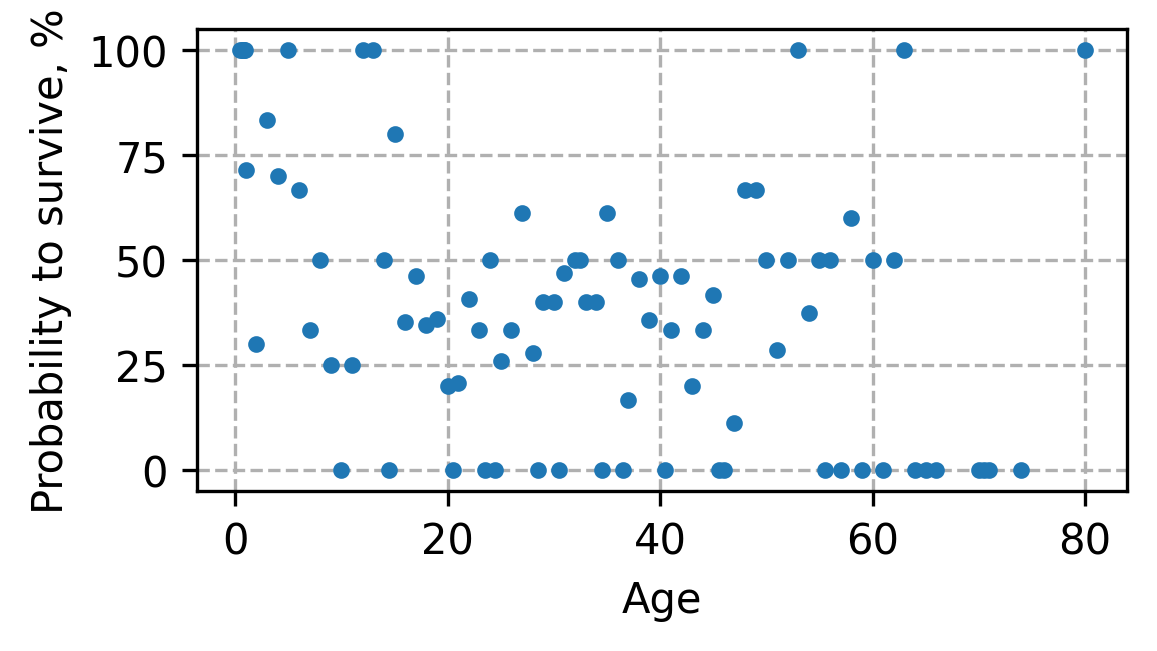

In [112]:
# 6. Постройте график зависимости доли выживаемости от возроста
age_part = titanic.groupby(['age']).agg({"survived": "mean"})

plt.figure(figsize=(4,2), dpi = 300) # размер графика
plt.xlabel("Age") # подписи к осям
plt.ylabel("Probability to survive, %")
plt.grid(True, linestyle="--") # пунктирная сетка

plt.plot(age_part.index.values, age_part["survived"] * 100, ".")
# plt.legend() # легенда
plt.show()

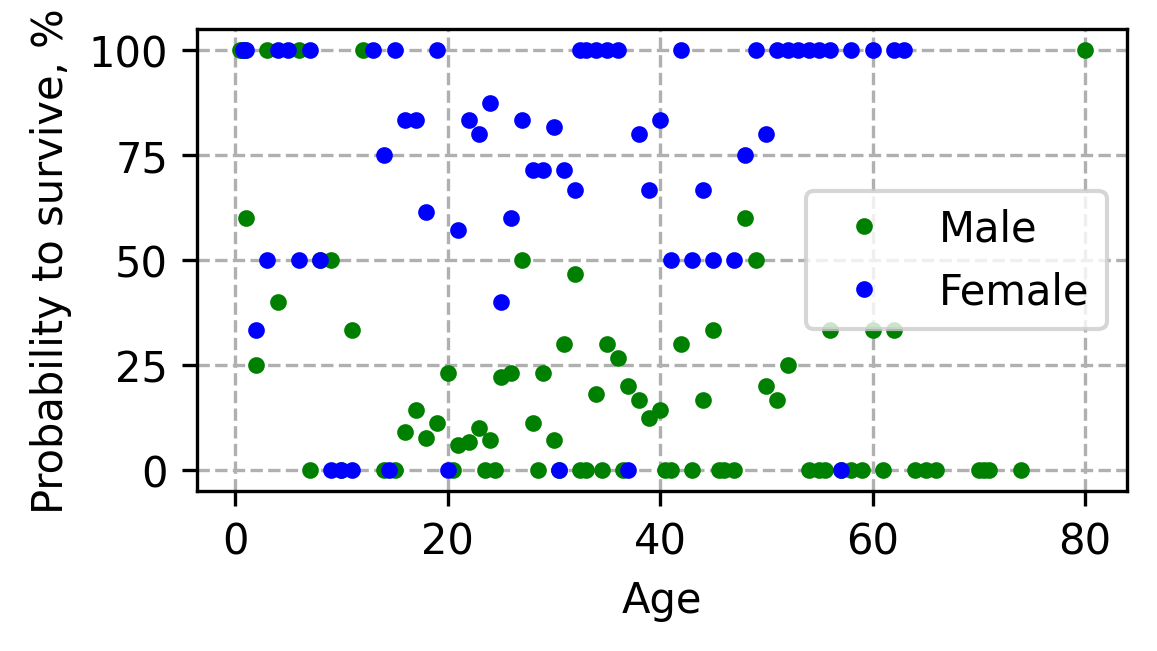

In [119]:
# 7. Постройте куммулятивный график выживаемости в зависимости от возраста для разных полов
age_part_male = titanic[titanic["sex"] == "male"].groupby(['age']).agg({"survived": "mean"})
age_part_female = titanic[titanic["sex"] == "female"].groupby(['age']).agg({"survived": "mean"})

plt.figure(figsize=(4,2), dpi = 300) # размер графика
plt.xlabel("Age") # подписи к осям
plt.ylabel("Probability to survive, %")
plt.grid(True, linestyle="--") # пунктирная сетка

plt.plot(age_part_male.index.values, age_part_male["survived"] * 100, "g.", label = "Male")
plt.plot(age_part_female.index.values, age_part_female["survived"] * 100, "b.", label = "Female")
plt.legend() # легенда
plt.show()

In [120]:
# 8. Определите общие расходы пассажиров
general_charges = titanic["fare"].sum()
general_charges

28693.9493

In [ ]:
# 9. Средих всех пассажиров найдите Екатерин (`Kate`, `Katerina`, `Ekaterina` ...)
kate = titanic["fare"].sum()

In [ ]:
# 10. `*`Определите имена для мужчин и женщин, которые чаще остальных встречались на корабле. Выведите список первых пяти.